In [100]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import torch as th
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

# Input
#-------
#age age in years
#sex
#bmi body mass index
#bp average blood pressure
#s1 tc, total serum cholesterol
#s2 ldl, low-density lipoproteins
#s3 hdl, high-density lipoproteins
#s4 tch, total cholesterol / HDL
#s5 ltg, possibly log of serum triglycerides level
#s6 glu, blood sugar level

# Output
#----
#A quantitative measure of disease progression one year after baseline

X,Y = load_diabetes(return_X_y=True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

print(X.shape)
print(Y.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(442, 10)
(442,)
(353, 10)
(353,)
(89, 10)
(89,)


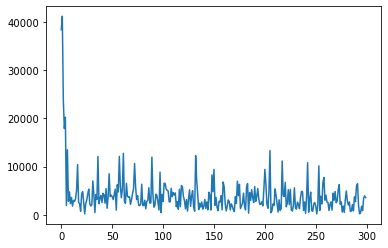

In [136]:
HIDDEN_LAYER = 100
MAX_EPOCH = 300
LEARNING_RATE = 0.001
MINIBATCH_SIZE = 25

class NeuralNet(nn.Module):
    def __init__(self):
        nn.Module.__init__(self)
        self.l1 = nn.Linear(10, HIDDEN_LAYER)
        self.l2 = nn.Linear(HIDDEN_LAYER, HIDDEN_LAYER)
        self.l3 = nn.Linear(HIDDEN_LAYER, 1)

    def forward(self, x):
        x = self.l1(x)
        x = F.softplus(x)
        x = self.l2(x)
        x = F.softplus(x)
        x = self.l3(x)   
        return x
    
model = NeuralNet()
optimizer = optim.Adam(model.parameters(), LEARNING_RATE)
criterion = nn.MSELoss()

loss_list=np.zeros(MAX_EPOCH)

diabetes_dataset = TensorDataset(th.Tensor(X_train),th.Tensor(Y_train))
diabetes_dataloader = DataLoader(diabetes_dataset, batch_size=MINIBATCH_SIZE, shuffle=True, num_workers=0) 

for epoch in range(MAX_EPOCH):
    for Xbatch, Ybatch in diabetes_dataloader:
        loss = criterion(model(Xbatch), Ybatch.view(-1,1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_list[epoch] = loss
    
plt.plot(loss_list)
plt.show()

In [137]:
y_predict = model(th.Tensor(X_test)).view(-1).detach().numpy()
rmse = np.sqrt(mean_squared_error(Y_test, y_predict))
print(rmse)


55.26959428025076
